# 字幕分析結果の可視化

rouge, duration, view_count などの分布可視化、相関分析


In [1]:
import os
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
with open("../results/rouge_scores.json") as f:
    data = json.load(f)

In [4]:
view_counts, durations, rouge_scores, channel_names = [], [], [], []

num_no_rouge = 0
for v in data.values():
    if "rouge_scores" in v.keys():
        view_counts.append(v["view_count"])
        durations.append(v["duration"])
        rouge_scores.append(list(v["rouge_scores"].values())[0]["rougeL"])
        channel_names.append(v["channel_name"])
    else:
        num_no_rouge += 1

print("rouge結果なし", num_no_rouge)
print("rouge結果あり", len(rouge_scores))

# view_counts = [v["view_count"] for v in data.values()]  
# durations = [v["duration"] for v in data.values()] 
# rouge_scores = [list(v["rouge_scores"].values())[0]["rougeL"] for v in data.values()]

rouge結果なし 265
rouge結果あり 202


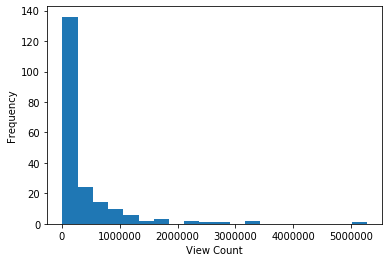

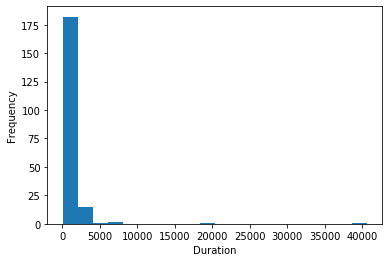

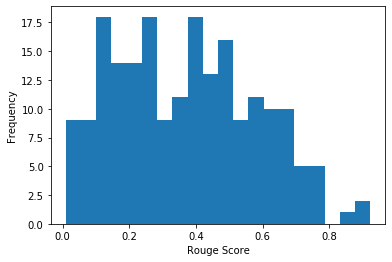

In [42]:
plt.figure()
plt.hist(view_counts, bins=20)
plt.xlabel("View Count")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(durations, bins=20)
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(rouge_scores, bins=20)
plt.xlabel("Rouge Score")
plt.ylabel("Frequency")
plt.show()



In [7]:
# 0.7程度スコアがある動画を見ると、かなり字幕と発言が一致している印象だった
# rouge 0.7以上の割合
threshold = 0.7
print(f"rouge {threshold}以上の割合", np.sum(np.array(rouge_scores) >= threshold) / len(rouge_scores))


rouge 0.7以上の割合 0.0594059405940594


In [7]:
# durations, view_countsが正規分布ではないので、スピアマンの順位相関係数を使う

coef,p = stats.spearmanr(view_counts, rouge_scores)
print("View Count vs Rouge Score")
print("Spearman's correlation coefficient:", coef)
print("p-value:", p)

coef,p = stats.spearmanr(durations, rouge_scores)
print("Duration vs Rouge Score")
print("Spearman's correlation coefficient:", coef)
print("p-value:", p)

# durations, view_counts
coef,p = stats.spearmanr(durations, view_counts)
print("Duration vs View Count")
print("Spearman's correlation coefficient:", coef)
print("p-value:", p)



View Count vs Rouge Score
Spearman's correlation coefficient: 0.04916588002371643
p-value: 0.48714157352857046
Duration vs Rouge Score
Spearman's correlation coefficient: -0.1939484798538054
p-value: 0.005679545762594417
Duration vs View Count
Spearman's correlation coefficient: 0.23849606309666332
p-value: 0.0006306264443023438


In [30]:
# # 相関係数
# correlation_coefficient_1 = np.corrcoef(view_counts, rouge_scores)[0, 1]
# print(correlation_coefficient_1)

# orrelation_coefficient_2 = np.corrcoef(durations, rouge_scores)[0, 1]
# print(orrelation_coefficient_2)

# orrelation_coefficient_3 = np.corrcoef(durations, view_counts)[0, 1]
# print(orrelation_coefficient_3)

0.07222892966826945
-0.12592626653053118
0.03515635469838379


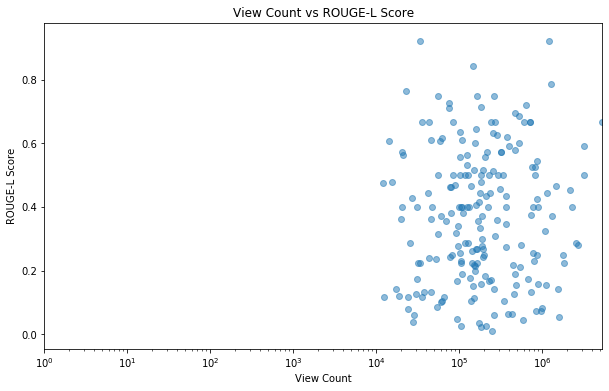

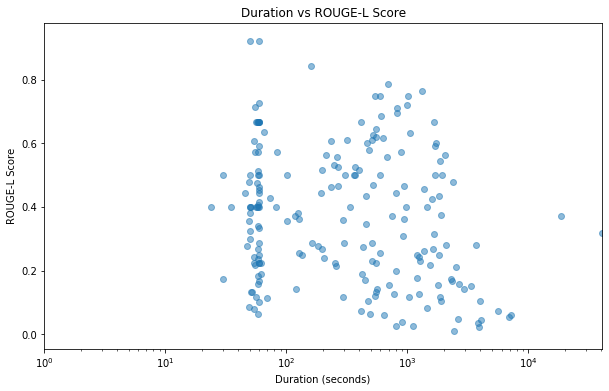

In [34]:
result_dir = "./"

# 2Dの散布図（再生回数 vs ROUGE-L）
plt.figure(figsize=(10, 6))
plt.scatter(view_counts, rouge_scores, alpha=0.5)
plt.xlabel("View Count")
plt.ylabel("ROUGE-L Score")
plt.title("View Count vs ROUGE-L Score")
plt.xscale("log")
plt.xlim(1, max(view_counts))
plt.savefig(os.path.join(result_dir, "view_count_vs_rouge_score.png"), dpi=300, bbox_inches="tight")
# plt.close()
plt.show()

# 2Dの散布図（動画の長さ vs ROUGE-L）
plt.figure(figsize=(10, 6))
plt.scatter(durations, rouge_scores, alpha=0.5)
plt.xlabel("Duration (seconds)")
plt.ylabel("ROUGE-L Score")
plt.title("Duration vs ROUGE-L Score")
plt.xscale("log")
plt.xlim(1, max(durations))
plt.savefig(os.path.join(result_dir, "duration_vs_rouge_score.png"), dpi=300, bbox_inches="tight")
# plt.close()
plt.show()

In [39]:
pd.Series(channel_names).value_counts().head(20)

日テレNEWS                               29
NewsPicks /ニューズピックス                   15
TBS NEWS DIG Powered by JNN           14
ANNnewsCH                             12
GAL放送部【石丸伸二切り抜き】                      12
FNNプライムオンライン                           7
中田敦彦のYouTube大学 - NAKATA UNIVERSITY     5
選挙ドットコムちゃんねる                           5
真相深入り! 虎ノ門ニュース                         4
【ねこず】戦う石丸伸二　応援tv　                      4
にっぽん見守り党                               4
10代20代のための政治【桜井誠切り抜き】                  3
ひろゆけ【ひろゆき切り抜き】                         3
Ripbanwinkle                           3
髙橋洋一チャンネル                              2
赤木レイア                                  2
ヤル気の出る名言でモチベーション上げるぞ                   2
上泉雄一のええなぁ!【公式】                         2
楽待 RAKUMACHI                           2
暇空茜                                    2
dtype: int64